In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from scipy import stats


In [2]:
orig_url = "https://drive.google.com/file/d/15pRixHlHOxnx6qixvMSY_zyUfYUr48TA/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(dwn_url)
print(df.shape)
df.head()

(8500, 18)


customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1  stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2  CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3  0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4  6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  \
0                          0.818182                0.000000                 0   
1                          0.833333                0.000000                 0   
2                          0.000000                0.272727                 6   
3                          0.000000                0.000000                 0   
4                          0.000000                0.166667                 3   

   nr_purchases  credit_limit  fixed_rate_period     payments  min_payments  \
0            10        1000.0                 11    89.868853     89.711672   
1             6        1000.0                  6    54.722514     82.955180   
2             0        1500.0                 11   303.031979    443.781316   
3            13        2000.0                 12   704.240770    795.859808   
4             1        2500.0                 12  4094.261427     40.142262   

   full_payment_prc  
0          0.428571  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000

The features:

customer_id : id of the credit card holder <br>
balance_account : balance amount left in the account to make purchases at the end of the 6-month period<br>
purchases_amount : amount of purchases made from account<br>
paid_advance : number of transactions made with “Cash in Advance” method<br>
full_purchases : maximum purchase amount done in full payment<br>
balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)<br>
installments : amount of purchases done in installments<br>
purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)<br>
full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)<br>
purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)<br>
cash_advance_frequency : how frequently the cash in advance being paid<br>
nr_cash_advances : cash in advance given by the user<br>
nr_purchases : number of purchase transactions made<br>
credit_limit : limit of credit card for user<br>
fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)<br>
payments : amount of payment done by user<br>
min_payments : minimum amount of payments made by user<br>
full_payment_prc : percent of full payment paid by user<br>

In [3]:
# Check for NaN values
print(df.isnull().sum())

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [5]:
# Verify that all IDs are unique
if df["customer_id"].nunique() == len(df):
    print("All IDs are unique")
else:
    print("Duplicate IDs found")

All IDs are unique


In [6]:
df["customer_id"], _ = pd.factorize(df["customer_id"])

In [7]:
df["min_payments"].fillna(0, inplace=True)

In [8]:
df[df["credit_limit"].isnull()]

customer_id  balance_account  purchases_amount  paid_advance  \
7898         7898        18.400472               0.0    186.853063   

      full_purchases  balance_frequency_update  installments  \
7898             0.0                  0.166667           0.0   

      purchases_frequency  full_purchases_frequency  \
7898                  0.0                       0.0   

      purchases_installments_frequency  cash_advance_frequency  \
7898                               0.0                0.166667   

      nr_cash_advances  nr_purchases  credit_limit  fixed_rate_period  \
7898                 1             0           NaN                  6   

      payments  min_payments  full_payment_prc  
7898  9.040017     14.418723               0.0

In [9]:
df[df["min_payments"].isnull()]

Empty DataFrame
Columns: [customer_id, balance_account, purchases_amount, paid_advance, full_purchases, balance_frequency_update, installments, purchases_frequency, full_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, nr_cash_advances, nr_purchases, credit_limit, fixed_rate_period, payments, min_payments, full_payment_prc]
Index: []

In [10]:
# Drop rows with missing credit_limit values
df.dropna(subset=["min_payments"], inplace=True)

In [11]:
# Drop rows with missing credit_limit values
df.dropna(subset=["credit_limit"], inplace=True)

In [12]:
df.describe()

customer_id  balance_account  purchases_amount  paid_advance  \
count  8499.000000      8499.000000       8499.000000   8499.000000   
mean   4249.070714      1566.123488        999.678921    973.601099   
std    2453.708139      2090.568889       2154.288912   2078.643835   
min       0.000000         0.000000          0.000000      0.000000   
25%    2124.500000       126.397887         39.270000      0.000000   
50%    4249.000000       869.091492        360.000000      0.000000   
75%    6373.500000      2053.907223       1105.905000   1113.773625   
max    8499.000000     19043.138560      49039.570000  47137.211760   

       full_purchases  balance_frequency_update  installments  \
count     8499.000000               8499.000000   8499.000000   
mean       588.234569                  0.876355    411.756934   
std       1669.552216                  0.237406    910.185030   
min          0.000000                  0.000000      0.000000   
25%          0.000000                  0.881944      0.000000   
50%         37.500000                  1.000000     89.000000   
75%        570.910000                  1.000000    466.730000   
max      40761.250000                  1.000000  22500.000000   

       purchases_frequency  full_purchases_frequency  \
count          8499.000000               8499.000000   
mean              0.489441                  0.201964   
std               0.401063                  0.297765   
min               0.000000                  0.000000   
25%               0.083333                  0.000000   
50%               0.500000                  0.083333   
75%               0.916667                  0.285714   
max               1.000000                  1.000000   

       purchases_installments_frequency  cash_advance_frequency  \
count                       8499.000000             8499.000000   
mean                           0.363839                0.135284   
std                            0.397166                0.200903   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.222222   
max                            1.000000                1.500000   

       nr_cash_advances  nr_purchases  credit_limit  fixed_rate_period  \
count       8499.000000   8499.000000   8499.000000        8499.000000   
mean           3.253912     14.678786   4485.848704          11.516767   
std            6.855243     25.002525   3629.804040           1.337862   
min            0.000000      0.000000     50.000000           6.000000   
25%            0.000000      1.000000   1500.000000          12.000000   
50%            0.000000      7.000000   3000.000000          12.000000   
75%            4.000000     17.000000   6500.000000          12.000000   
max          123.000000    358.000000  30000.000000          12.000000   

           payments  min_payments  full_payment_prc  
count   8499.000000   8499.000000       8499.000000  
mean    1721.452449    835.344531          0.152605  
std     2893.311499   2352.552090          0.291518  
min        0.000000      0.000000          0.000000  
25%      382.089195    162.649136          0.000000  
50%      851.338405    288.469452          0.000000  
75%     1897.066428    787.399867          0.142857  
max    50721.483360  76406.207520          1.000000

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap using Plotly
fig = px.imshow(corr_matrix.values,
                x=list(corr_matrix.columns),
                y=list(corr_matrix.index),
                color_continuous_scale="RdBu",
                zmin=-1,
                zmax=1,
                labels=dict(x="Features", y="Features", color="Correlation"),
                width=700, height=700)
fig.show()

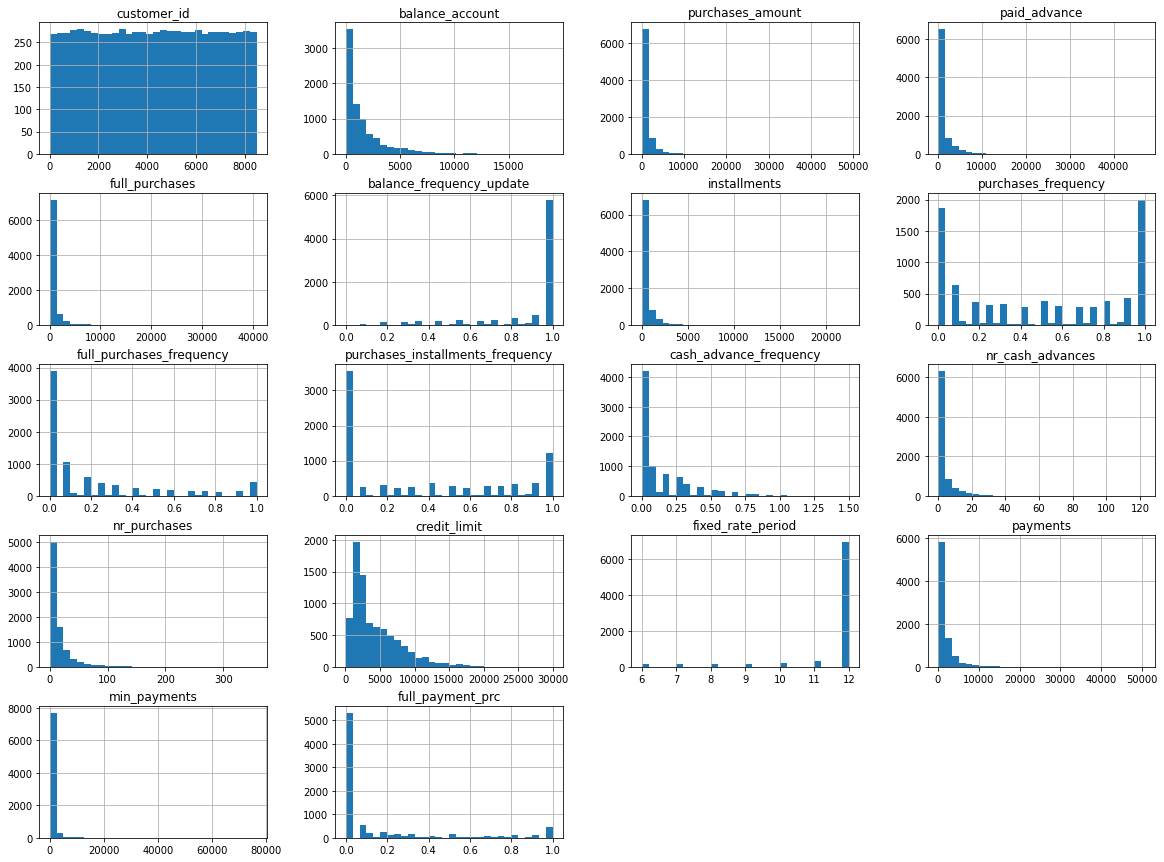

In [61]:
# Plot histograms for each feature
df.hist(bins=30, figsize=(20, 15))
plt.show()

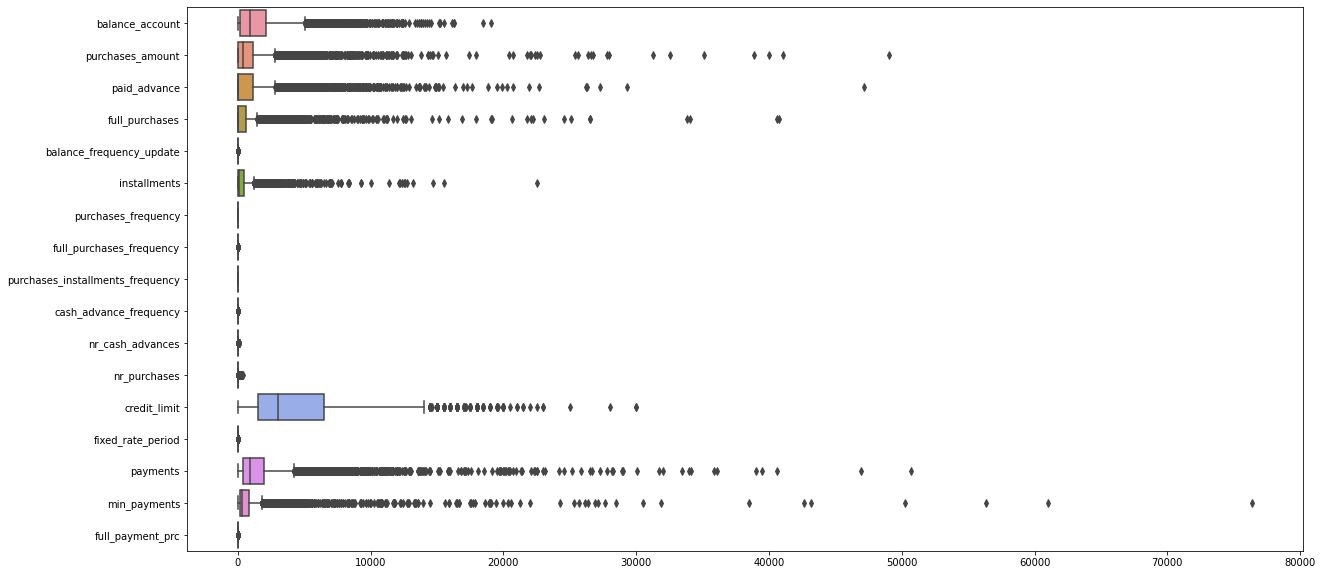

In [62]:
# Create box plots for each numeric feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(["customer_id"], axis=1), orient="h")
plt.show()

### Dimensionality Reduction

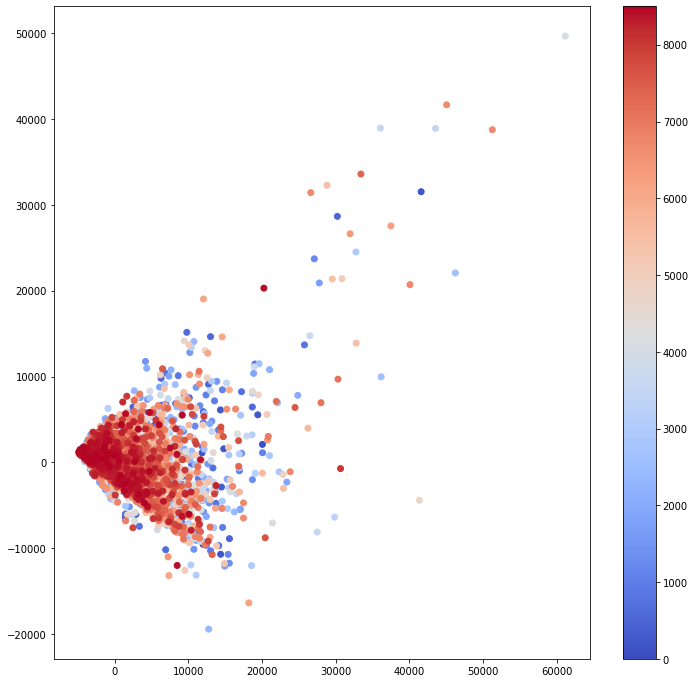

In [66]:
from sklearn.decomposition import PCA
from sklearn import datasets 
X, color = datasets.make_swiss_roll(n_samples=1500)

# Perform PCA to reduce the dimensionality of the data
pca = PCA()
X_pca = pca.fit_transform(df.drop("customer_id", axis=1))

# Plot the reduced data using a scatter plot
plt.rcParams["figure.figsize"] = (12, 12)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["customer_id"], cmap="coolwarm")
plt.colorbar()
plt.show()
###########################




[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8201 samples in 0.002s...
[t-SNE] Computed neighbors for 8201 samples in 1.095s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8201
[t-SNE] Computed conditional probabilities for sample 2000 / 8201
[t-SNE] Computed conditional probabilities for sample 3000 / 8201
[t-SNE] Computed conditional probabilities for sample 4000 / 8201
[t-SNE] Computed conditional probabilities for sample 5000 / 8201
[t-SNE] Computed conditional probabilities for sample 6000 / 8201
[t-SNE] Computed conditional probabilities for sample 7000 / 8201
[t-SNE] Computed conditional probabilities for sample 8000 / 8201
[t-SNE] Computed conditional probabilities for sample 8201 / 8201
[t-SNE] Mean sigma: 298.862265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.390732
[t-SNE] KL divergence after 1000 iterations: 1.143675


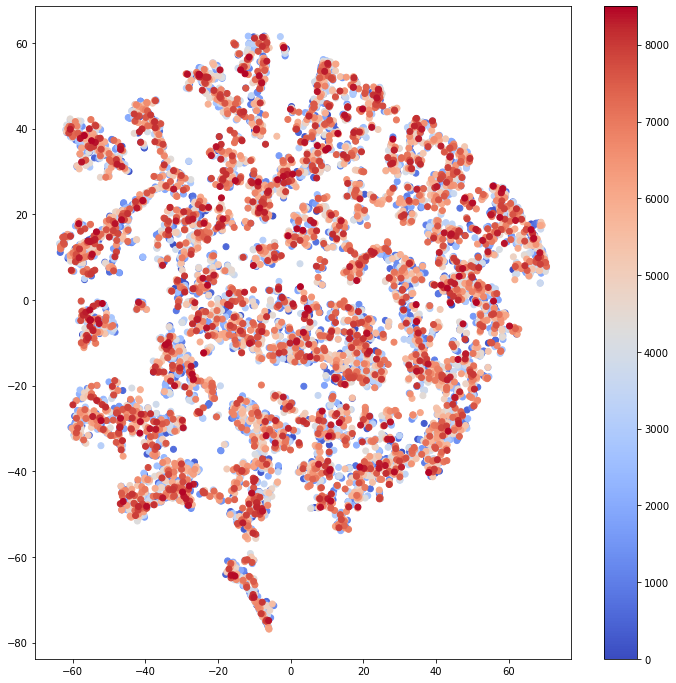

In [67]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce the dimensionality of the data

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(df.drop("customer_id", axis=1))

# Plot the reduced data using a scatter plot
plt.rcParams["figure.figsize"] = (12, 12)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["customer_id"], cmap="coolwarm")
plt.colorbar()
plt.show()

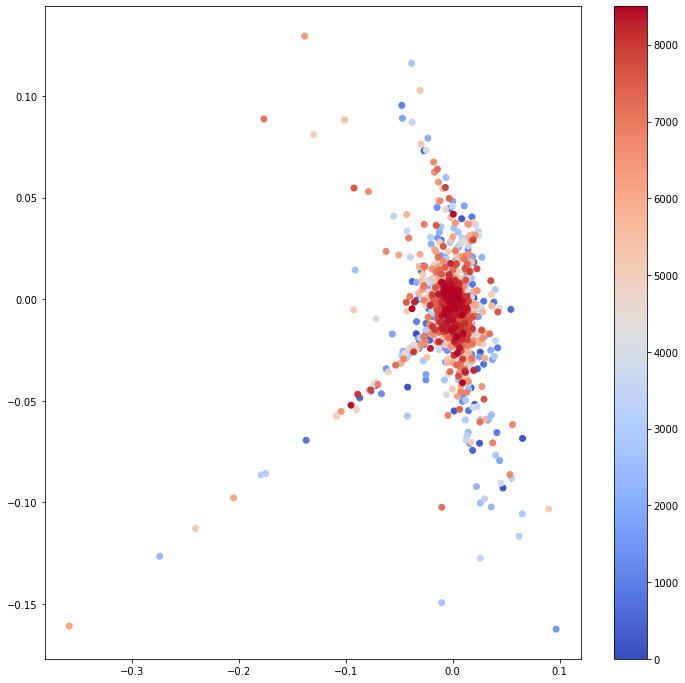

In [69]:
from sklearn.manifold import LocallyLinearEmbedding


# Perform LLE to reduce the dimensionality of the data
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(df.drop("customer_id", axis=1))

# Plot the reduced data using a scatter plot
plt.rcParams["figure.figsize"] = (12, 12)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=df["customer_id"], cmap="coolwarm")
plt.colorbar()
plt.show()

In [71]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=10c730fcc1cf748dd3aa25813d93791321616d3af0127a12ef3acdac6cdcfcc4
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=36006cf00bb709026d76c75ba277a5706bb00ed1f2eea069769e6d3c4afe7545
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


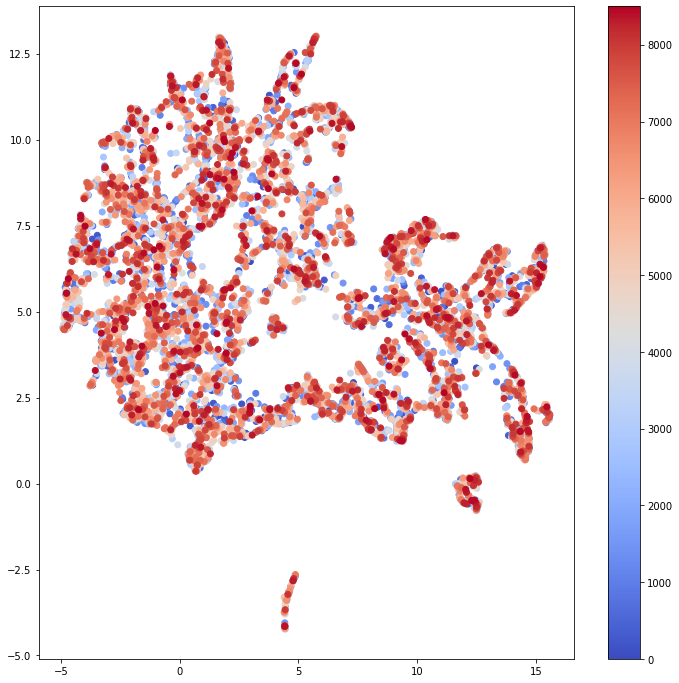

In [72]:
import umap

# Perform UMAP to reduce the dimensionality of the data
reducer = umap.UMAP(n_components=2, n_neighbors=10, random_state=42)
X_umap = reducer.fit_transform(df.drop("customer_id", axis=1))

# Plot the reduced data using a scatter plot
plt.rcParams["figure.figsize"] = (12, 12)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df["customer_id"], cmap="coolwarm")
plt.colorbar()
plt.show()

### T-SNE

In [75]:
scaler = StandardScaler()
sc_df = scaler.fit_transform(df.drop("customer_id", axis=1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8201 samples in 0.001s...
[t-SNE] Computed neighbors for 8201 samples in 0.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8201
[t-SNE] Computed conditional probabilities for sample 2000 / 8201
[t-SNE] Computed conditional probabilities for sample 3000 / 8201
[t-SNE] Computed conditional probabilities for sample 4000 / 8201
[t-SNE] Computed conditional probabilities for sample 5000 / 8201
[t-SNE] Computed conditional probabilities for sample 6000 / 8201
[t-SNE] Computed conditional probabilities for sample 7000 / 8201
[t-SNE] Computed conditional probabilities for sample 8000 / 8201
[t-SNE] Computed conditional probabilities for sample 8201 / 8201
[t-SNE] Mean sigma: 0.431232
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.294556
[t-SNE] KL divergence after 2000 iterations: 1.554569


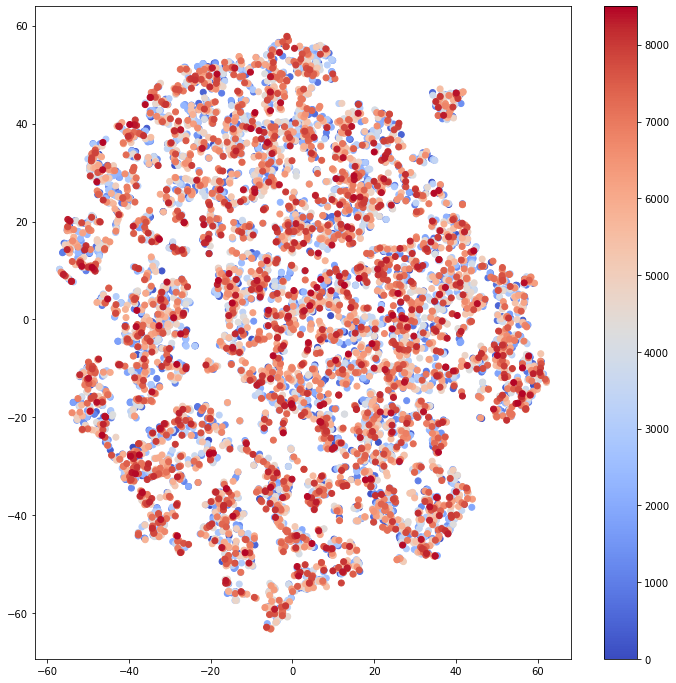

In [76]:
# Perform t-SNE to reduce the dimensionality of the data

tsne = TSNE(n_components=2, verbose=1, perplexity=30, learning_rate=10, n_iter=2000, random_state=42)
X_tsne = tsne.fit_transform(sc_df)

# Plot the reduced data using a scatter plot
plt.rcParams["figure.figsize"] = (12, 12)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["customer_id"], cmap="coolwarm")
plt.colorbar()
plt.show()

KeyboardInterrupt: ignored

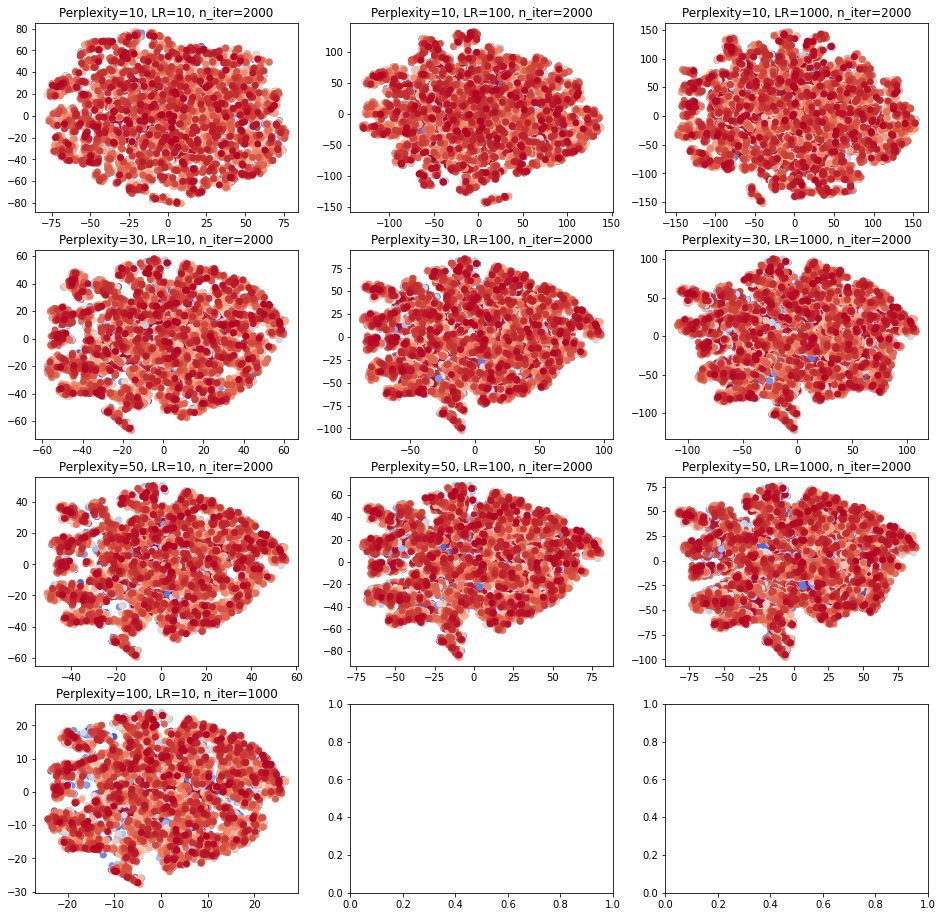

In [74]:
# Define a range of parameter values to try
perplexities = [10, 30, 50, 100]
learning_rates = [10, 100, 1000]
n_iters = [500, 1000, 2000]

# Loop over the parameter combinations and plot the resulting embeddings
fig, axes = plt.subplots(len(perplexities), len(learning_rates), figsize=(16, 16))
for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        for k, n_iter in enumerate(n_iters):
            tsne = TSNE(n_components=2, verbose=0, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, method='barnes_hut', random_state=42)
            X_tsne = tsne.fit_transform(df.drop("customer_id", axis=1))
            ax = axes[i][j]
            ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df["customer_id"], cmap="coolwarm")
            ax.set_title(f"Perplexity={perplexity}, LR={learning_rate}, n_iter={n_iter}")
plt.tight_layout()
plt.show()

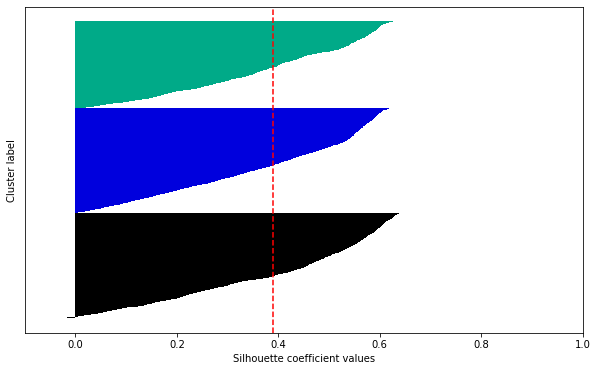

In [82]:
# Cluster the points using K-means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=1000, max_iter=10000)
labels = kmeans.fit_predict(X_tsne)

# Compute the silhouette scores for each point
silhouette_vals = silhouette_samples(X_tsne, labels)

# Compute the overall silhouette score
silhouette_avg = silhouette_score(X_tsne, labels)

# Plot the silhouette scores for each point
fig, ax = plt.subplots(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(5):
    # Select the silhouette scores for points in cluster i
    cluster_silhouette_vals = silhouette_vals[labels == i]
    
    # Sort the scores in ascending order
    cluster_silhouette_vals.sort()
    
    # Compute the size of the cluster
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    
    # Plot the silhouette scores for the points in cluster i
    color = cm.nipy_spectral(float(i) / 5)
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i
    
# Add labels and a vertical line indicating the overall silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

# Set the y-axis ticks and limits
ax.set_yticks([])
ax.set_xlim([-0.1, 1])

plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8499 samples in 0.001s...
[t-SNE] Computed neighbors for 8499 samples in 0.608s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8499
[t-SNE] Computed conditional probabilities for sample 2000 / 8499
[t-SNE] Computed conditional probabilities for sample 3000 / 8499
[t-SNE] Computed conditional probabilities for sample 4000 / 8499
[t-SNE] Computed conditional probabilities for sample 5000 / 8499
[t-SNE] Computed conditional probabilities for sample 6000 / 8499
[t-SNE] Computed conditional probabilities for sample 7000 / 8499
[t-SNE] Computed conditional probabilities for sample 8000 / 8499
[t-SNE] Computed conditional probabilities for sample 8499 / 8499
[t-SNE] Mean sigma: 0.431764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.501022
[t-SNE] KL divergence after 2000 iterations: 1.562305
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8499 samples in 0.002s...
[t-SNE] Computed nei

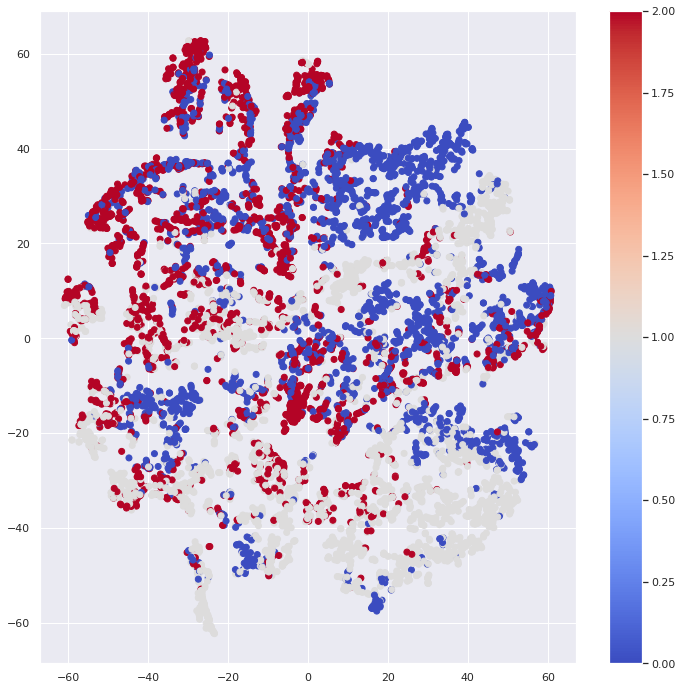

In [190]:

# Define a function to perform TSNE
def tsne_func(X):
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, learning_rate=10, n_iter=2000, random_state=42)
    X_tsne = tsne.fit_transform(X)
    return X_tsne

# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("tsne", FunctionTransformer(tsne_func)),
    ("cluster", KMeans(n_clusters=3, random_state=42, n_init=1000, max_iter=10000))
])

# Fit the pipeline to the data
pipeline.fit(df.drop("customer_id", axis=1))

# Get the t-SNE embeddings
X_tsne = pipeline.named_steps["tsne"].transform(df.drop("customer_id", axis=1))

# Get the cluster labels
labels = pipeline.predict(df.drop("customer_id", axis=1))


# Plot the reduced data using a scatter plot
plt.rcParams["figure.figsize"] = (12, 12)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="coolwarm")
plt.colorbar()
plt.show()

In [192]:
ts_df = df.copy()
ts_df["clusters"] = labels
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 8499
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8499 non-null   int64  
 1   balance_account                   8499 non-null   float64
 2   purchases_amount                  8499 non-null   float64
 3   paid_advance                      8499 non-null   float64
 4   full_purchases                    8499 non-null   float64
 5   balance_frequency_update          8499 non-null   float64
 6   installments                      8499 non-null   float64
 7   purchases_frequency               8499 non-null   float64
 8   full_purchases_frequency          8499 non-null   float64
 9   purchases_installments_frequency  8499 non-null   float64
 10  cash_advance_frequency            8499 non-null   float64
 11  nr_cash_advances                  8499 non-null   int64  
 12  nr_pur

In [196]:
ts_df['clusters'].value_counts()

1    3098
0    2884
2    2517
Name: clusters, dtype: int64

In [193]:
ts_df.head()

customer_id  balance_account  purchases_amount  paid_advance  \
0            0         9.298409            107.60      0.000000   
1            1        52.666422            150.30      0.000000   
2            2      1360.795674              0.00    462.861443   
3            3      2021.641161            363.18      0.000000   
4            4        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  \
0                          0.818182                0.000000                 0   
1                          0.833333                0.000000                 0   
2                          0.000000                0.272727                 6   
3                          0.000000                0.000000                 0   
4                          0.000000                0.166667                 3   

   nr_purchases  credit_limit  fixed_rate_period     payments  min_payments  \
0            10        1000.0                 11    89.868853     89.711672   
1             6        1000.0                  6    54.722514     82.955180   
2             0        1500.0                 11   303.031979    443.781316   
3            13        2000.0                 12   704.240770    795.859808   
4             1        2500.0                 12  4094.261427     40.142262   

   full_payment_prc  clusters  
0          0.428571         2  
1          0.000000         2  
2          0.000000         1  
3          0.000000         0  
4          0.000000         2

In [194]:
ts_df.columns.tolist()

['customer_id',
 'balance_account',
 'purchases_amount',
 'paid_advance',
 'full_purchases',
 'balance_frequency_update',
 'installments',
 'purchases_frequency',
 'full_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'nr_cash_advances',
 'nr_purchases',
 'credit_limit',
 'fixed_rate_period',
 'payments',
 'min_payments',
 'full_payment_prc',
 'clusters']

In [195]:
fig = px.scatter_matrix(ts_df,
    dimensions=[
  'balance_account',
  'purchases_amount',
  'paid_advance',
  'full_purchases',
  'installments',
  'purchases_frequency',
  'full_purchases_frequency',
  'purchases_installments_frequency',
  'cash_advance_frequency',
  'nr_cash_advances',
  'nr_purchases',
  'credit_limit',
  'fixed_rate_period',
  'payments',],
    color='clusters',
    symbol='clusters',
    title='Scatter Matrix of Clustered Customers'
)
fig.update_layout(width=2000, height=2000)
fig.show()

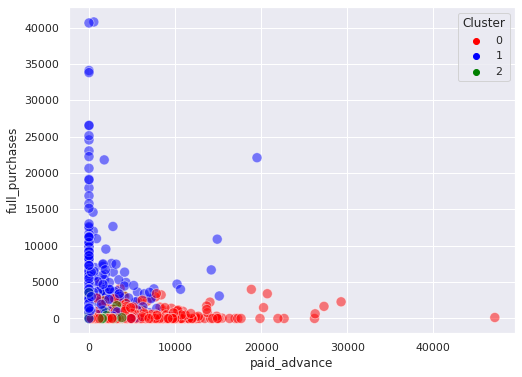

In [157]:
sns.set(style="darkgrid")

# Create scatterplot
scatterplot = sns.scatterplot(data=df, x='paid_advance', y='full_purchases', hue='Cluster', palette=['red', 'blue', 'green'], s=100, alpha=0.5)

# Set legend title
scatterplot.legend().set_title('Cluster')

# Show plot
plt.show()

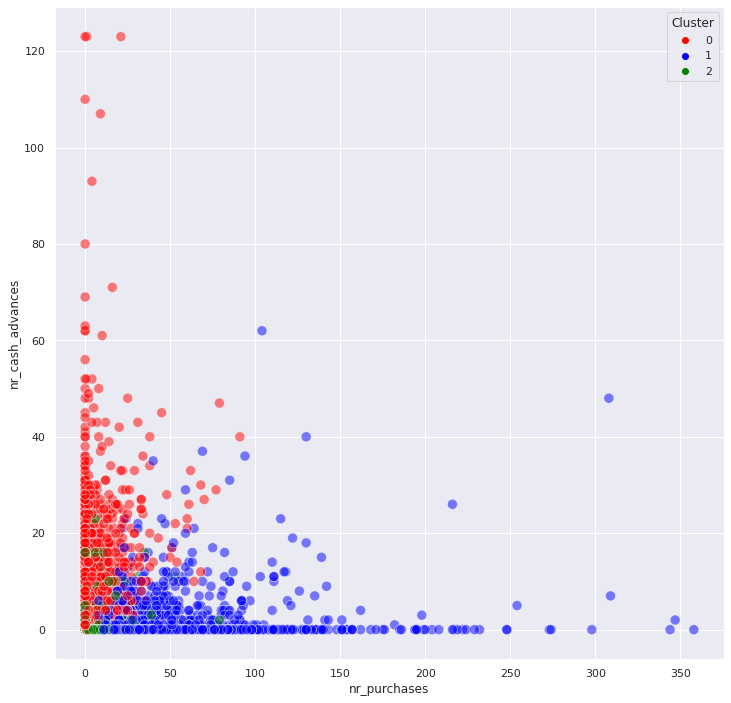

In [120]:
sns.set(style="darkgrid")

# Create scatterplot
scatterplot = sns.scatterplot(data=df, x='nr_purchases', y='nr_cash_advances', hue='Cluster', palette=['red', 'blue', 'green'], s=100, alpha=0.5)

# Set legend title
scatterplot.legend().set_title('Cluster')

# Show plot
plt.show()

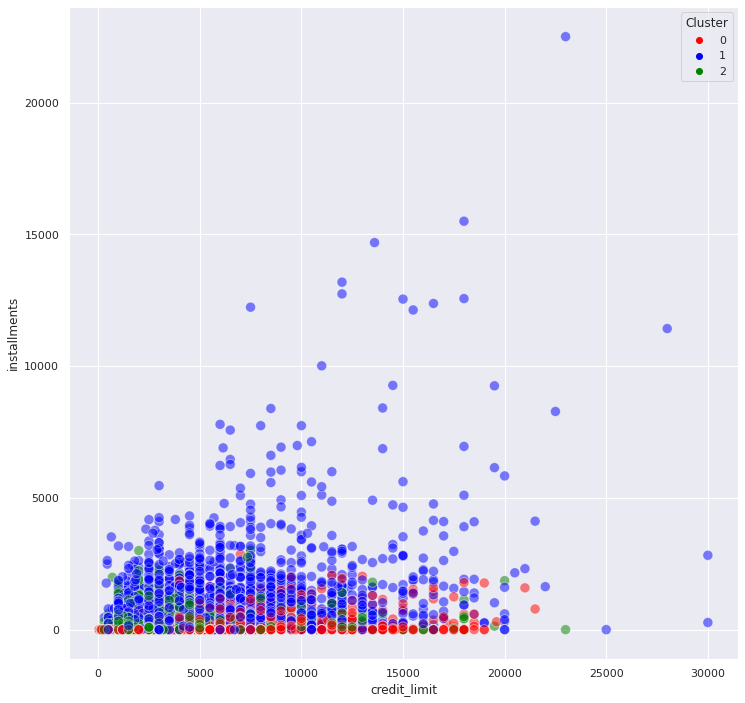

In [122]:
sns.set(style="darkgrid")

# Create scatterplot
scatterplot = sns.scatterplot(data=df, x='credit_limit', y='installments', hue='Cluster', palette=['red', 'blue', 'green'], s=100, alpha=0.5)

# Set legend title
scatterplot.legend().set_title('Cluster')

# Show plot
plt.show()

In [127]:
# Create a new DataFrame with the transformed installments data
df_box = df[['Cluster', 'installments']].copy()
df_box['installments'] = np.log(df_box['installments'])

# Create a box plot for each cluster
fig = px.box(df_box, x='Cluster', y='installments', points='all',
             labels={'installments': 'Log(Installments)'}, color='Cluster',
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Update the layout to include a title and adjust font size
fig.update_layout(title='Installments by Cluster', title_font_size=24,
                  font=dict(size=16))

# Show the plot
fig.show()


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



In [136]:
df['balance_credit_ratio'] = df['balance_account'] / df['credit_limit']


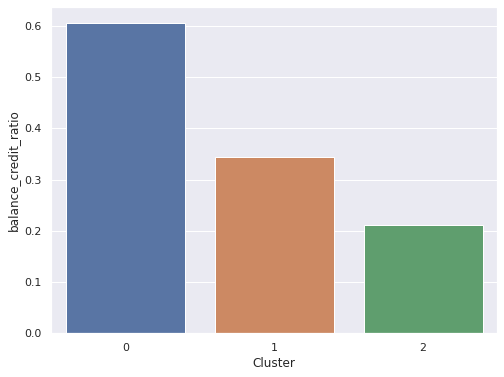

In [138]:
sns.barplot(x='Cluster', y='balance_credit_ratio', data=df, ci=None);

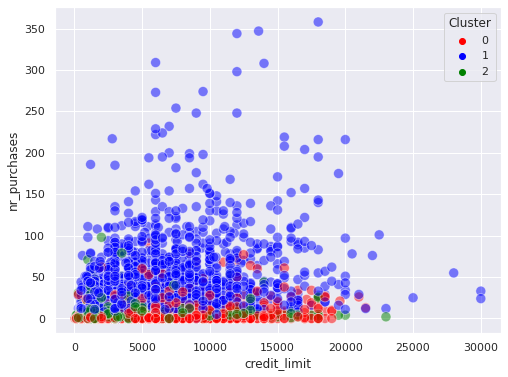

In [145]:
sns.set(style="darkgrid")

# Create scatterplot
scatterplot = sns.scatterplot(data=df, x='credit_limit', y='nr_purchases', hue='Cluster', palette=['red', 'blue', 'green'], s=100, alpha=0.5)

# Set legend title
scatterplot.legend().set_title('Cluster')

# Show plot
plt.show()

<AxesSubplot:>

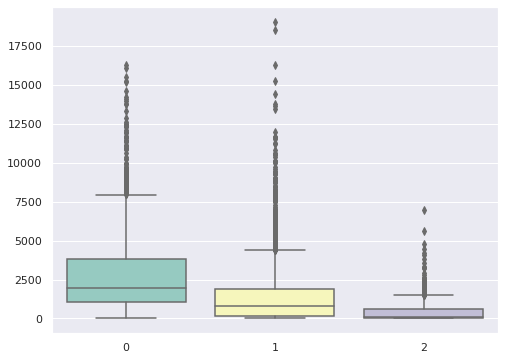

In [147]:
# Subset the data by cluster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]

# Create a boxplot for each cluster showing the distribution of balance_account
sns.boxplot(data=[cluster_0['balance_account'], cluster_1['balance_account'], cluster_2['balance_account']], palette='Set3')


### PCA


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning:

X has feature names, but PCA was fitted without feature names



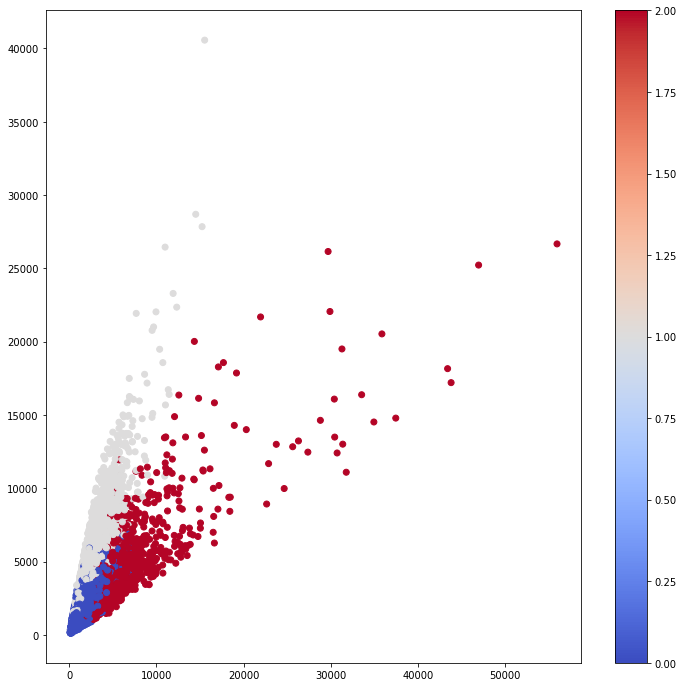

In [14]:
###################################################################################################################################################


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2, random_state=42)),
    ("cluster", KMeans(n_clusters=3, random_state=42, n_init=1000, max_iter=10000))
])

# Fit the pipeline to the data
pipeline.fit(df.drop("customer_id", axis=1))

# Get the PCA embeddings
X_pca = pipeline.named_steps["pca"].transform(df.drop("customer_id", axis=1))

# Get the cluster labels
labels = pipeline.predict(df.drop("customer_id", axis=1))

# Plot the reduced data using a scatter plot
plt.rcParams["figure.figsize"] = (12, 12)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="coolwarm")
plt.colorbar()
plt.show()


In [54]:
# Fit PCA to the data
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df.drop("customer_id", axis=1))

# Get the absolute values of the PCA loadings and sort them in descending order
loadings_abs = np.abs(pca.components_).mean(axis=0)
sorted_loadings_idx = np.argsort(loadings_abs)[::-1]

# Get the feature names
feature_names = df.drop("customer_id", axis=1).columns

# Print the feature names and their corresponding importance scores
for i in sorted_loadings_idx:
    print(f"{feature_names[i]}: {loadings_abs[i]}")


credit_limit: 0.5648921017461079
payments: 0.47545500072900754
purchases_amount: 0.399281412469763
balance_account: 0.3006608859471355
full_purchases: 0.2973470122999541
paid_advance: 0.21031932427082062
min_payments: 0.1689350574454792
installments: 0.10195264804906946
nr_purchases: 0.0029226410950065
nr_cash_advances: 0.00046464148931524475
full_purchases_frequency: 2.521999081050436e-05
purchases_frequency: 2.4761392160540805e-05
fixed_rate_period: 2.0671527410087296e-05
purchases_installments_frequency: 1.9203316855141594e-05
cash_advance_frequency: 1.5185762939819585e-05
full_payment_prc: 1.4072250925564484e-05
balance_frequency_update: 6.840464901376753e-06


In [55]:
pca_df = df.copy()
pca_df["clusters"] = labels
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8499 entries, 0 to 8499
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8499 non-null   int64  
 1   balance_account                   8499 non-null   float64
 2   purchases_amount                  8499 non-null   float64
 3   paid_advance                      8499 non-null   float64
 4   full_purchases                    8499 non-null   float64
 5   balance_frequency_update          8499 non-null   float64
 6   installments                      8499 non-null   float64
 7   purchases_frequency               8499 non-null   float64
 8   full_purchases_frequency          8499 non-null   float64
 9   purchases_installments_frequency  8499 non-null   float64
 10  cash_advance_frequency            8499 non-null   float64
 11  nr_cash_advances                  8499 non-null   int64  
 12  nr_pur

In [56]:
pca_df['clusters'].value_counts()

0    5791
1    1591
2    1117
Name: clusters, dtype: int64

In [176]:
from google.colab import files

pca_df.to_csv('pca_df.csv', index=False)
files.download('pca_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
fig = px.scatter_matrix(pca_df,
    dimensions=['balance_account', 'purchases_amount', 'purchases_frequency', 'full_purchases', 'installments', 'nr_purchases', 'payments',
                'credit_limit', 'nr_cash_advances'],
    color='clusters',
    symbol='clusters',
    title='Scatter Matrix of Clustered Customers',
    color_continuous_scale=['red', 'green', 'blue']
)
fig.update_layout(width=1400, height=1400)
fig.show()

In [57]:
def outlier_percentage(data):
    '''
    This function calculates the percentage of outlier in a dataset.
    '''
    quantile_1 = data.quantile(0.25)
    quantile_3 = data.quantile(0.75)
    IQR = quantile_3 - quantile_1
    lower_treshold = quantile_1 - (1.5 * IQR)
    upper_threshold = quantile_3 + (1.5 * IQR)
    num_outliers =  np.sum((data < lower_treshold) |(data > upper_threshold))
    outliers =  ((data < lower_treshold) |(data > upper_threshold))
    num_data = data.count()
    return (num_outliers/num_data)*100

In [66]:
def show_outlier(data):
    '''
    This function shows the percentage of outlier in each numerical column.
    '''
    for column in data.columns:
        data_section = data[column]
        percent = str(round(outlier_percentage(data_section), 2))
        print(f'Outlier in column "{column}": {percent}%')
        
no_id = pca_df.drop(['customer_id'], axis=1)
show_outlier(no_id)

Outlier in column "balance_account": 7.82%
Outlier in column "purchases_amount": 8.94%
Outlier in column "paid_advance": 11.57%
Outlier in column "full_purchases": 11.34%
Outlier in column "balance_frequency_update": 16.67%
Outlier in column "installments": 9.8%
Outlier in column "purchases_frequency": 0.0%
Outlier in column "full_purchases_frequency": 10.47%
Outlier in column "purchases_installments_frequency": 0.0%
Outlier in column "cash_advance_frequency": 5.89%
Outlier in column "nr_cash_advances": 9.07%
Outlier in column "nr_purchases": 8.44%
Outlier in column "credit_limit": 2.34%
Outlier in column "fixed_rate_period": 15.34%
Outlier in column "payments": 8.88%
Outlier in column "min_payments": 10.14%
Outlier in column "full_payment_prc": 16.32%
Outlier in column "clusters": 0.0%


In [67]:
no_id.head()

balance_account  purchases_amount  paid_advance  full_purchases  \
0         9.298409            107.60      0.000000            0.00   
1        52.666422            150.30      0.000000            0.00   
2      1360.795674              0.00    462.861443            0.00   
3      2021.641161            363.18      0.000000          363.18   
4        22.322374             95.00   1162.045833           95.00   

   balance_frequency_update  installments  purchases_frequency  \
0                  0.909091         107.6             0.909091   
1                  1.000000         150.3             1.000000   
2                  1.000000           0.0             0.000000   
3                  1.000000           0.0             1.000000   
4                  0.363636           0.0             0.083333   

   full_purchases_frequency  purchases_installments_frequency  \
0                  0.000000                          0.818182   
1                  0.000000                          0.833333   
2                  0.000000                          0.000000   
3                  1.000000                          0.000000   
4                  0.083333                          0.000000   

   cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                0.000000                 0            10        1000.0   
1                0.000000                 0             6        1000.0   
2                0.272727                 6             0        1500.0   
3                0.000000                 0            13        2000.0   
4                0.166667                 3             1        2500.0   

   fixed_rate_period     payments  min_payments  full_payment_prc  clusters  
0                 11    89.868853     89.711672          0.428571         0  
1                  6    54.722514     82.955180          0.000000         0  
2                 11   303.031979    443.781316          0.000000         0  
3                 12   704.240770    795.859808          0.000000         0  
4                 12  4094.261427     40.142262          0.000000         0

In [69]:
z = np.abs(stats.zscore(no_id))
pca_df_out = no_id[(z < 3).all(axis=1)]
pca_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance_account                   7069 non-null   float64
 1   purchases_amount                  7069 non-null   float64
 2   paid_advance                      7069 non-null   float64
 3   full_purchases                    7069 non-null   float64
 4   balance_frequency_update          7069 non-null   float64
 5   installments                      7069 non-null   float64
 6   purchases_frequency               7069 non-null   float64
 7   full_purchases_frequency          7069 non-null   float64
 8   purchases_installments_frequency  7069 non-null   float64
 9   cash_advance_frequency            7069 non-null   float64
 10  nr_cash_advances                  7069 non-null   int64  
 11  nr_purchases                      7069 non-null   int64  
 12  credit

In [70]:
cluster_0 = pca_df_out[pca_df_out['clusters']==0].drop('clusters', axis=1).mean()
cluster_1 = pca_df_out[pca_df_out['clusters']==1].drop('clusters', axis=1).mean()
cluster_2 = pca_df_out[pca_df_out['clusters']==2].drop('clusters', axis=1).mean()

In [71]:
cluster_0.sort_values(ascending=False)

credit_limit                        3296.025084
payments                             923.133985
balance_account                      816.027656
purchases_amount                     535.477418
min_payments                         447.987143
paid_advance                         299.430799
full_purchases                       275.700051
installments                         260.142146
fixed_rate_period                     11.736554
nr_purchases                           9.246462
nr_cash_advances                       1.147009
balance_frequency_update               0.860684
purchases_frequency                    0.478419
purchases_installments_frequency       0.350492
full_payment_prc                       0.158720
full_purchases_frequency               0.146998
cash_advance_frequency                 0.064296
dtype: float64

In [72]:
cluster_1.sort_values(ascending=False)

credit_limit                        5733.337729
balance_account                     3341.765957
paid_advance                        2791.426976
payments                            2083.819433
min_payments                        1136.722366
purchases_amount                     286.809662
full_purchases                       198.675986
installments                          88.167253
fixed_rate_period                     11.676015
nr_cash_advances                       9.015474
nr_purchases                           4.047389
balance_frequency_update               0.963603
cash_advance_frequency                 0.375929
purchases_frequency                    0.180964
purchases_installments_frequency       0.100296
full_purchases_frequency               0.091832
full_payment_prc                       0.023470
dtype: float64

In [73]:
cluster_2.sort_values(ascending=False)

credit_limit                        6598.777174
purchases_amount                    2941.492215
payments                            2849.693575
full_purchases                      1843.271087
balance_account                     1658.270905
installments                        1098.221128
min_payments                         690.522657
paid_advance                         377.092518
nr_purchases                          43.116848
fixed_rate_period                     11.947011
nr_cash_advances                       1.285326
balance_frequency_update               0.980911
purchases_frequency                    0.957447
purchases_installments_frequency       0.762086
full_purchases_frequency               0.657696
full_payment_prc                       0.300407
cash_advance_frequency                 0.060356
dtype: float64

In [75]:
def make_radar_chart(dataset, title):

    mean_feature_per_cluster = dataset.groupby("clusters").mean().to_numpy()
    name_feature = dataset.columns[0:-1]
    categories = np.arange(0, len(mean_feature_per_cluster))
    
    fig = go.Figure()

    for i in range(len(mean_feature_per_cluster)):
      fig.add_trace(go.Scatterpolar(
          r=mean_feature_per_cluster[i],
          theta=name_feature,
          name=f'class {categories[i]}'
      ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[np.min(mean_feature_per_cluster), np.max(mean_feature_per_cluster)]
        )),
      showlegend=True,
      width = 1200,
      height = 720,
      title = dict(text = f'Feature comparison ({title})\n',
                   font=dict(size=20))
    )

    fig.show()

make_radar_chart(pca_df_out, 'Credit Card Dataset')